In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, when
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType
from datetime import date
import pandas as pd

spark = SparkSession.builder.appName("Sales Performance Visualization").getOrCreate()

schema = StructType([
    StructField("order_id", StringType()),
    StructField("region", StringType()),
    StructField("category", StringType()),
    StructField("quantity", IntegerType()),
    StructField("price", IntegerType()),
    StructField("order_date", DateType())
])

data = [
    ("O001", "South", "Electronics", 3, 15000, date(2025, 1, 5)),
    ("O002", "North", "Clothing", 5, 2000, date(2025, 1, 6)),
    ("O003", "East", "Furniture", 2, 12000, date(2025, 1, 7)),
    ("O004", "West", "Electronics", 1, 18000, date(2025, 1, 8)),
    ("O005", "North", "Furniture", 4, 9000, date(2025, 1, 10)),
    ("O006", "South", "Clothing", 6, 2500, date(2025, 1, 11)),
    ("O007", "East", "Electronics", 2, 17000, date(2025, 1, 12)),
    ("O008", "South", "Furniture", 5, 8500, date(2025, 1, 15)),
    ("O009", "West", "Clothing", 7, 3000, date(2025, 1, 17)),
    ("O010", "North", "Electronics", 4, 16000, date(2025, 1, 18))
]

df = spark.createDataFrame(data, schema)
df.show()

+--------+------+-----------+--------+-----+----------+
|order_id|region|   category|quantity|price|order_date|
+--------+------+-----------+--------+-----+----------+
|    O001| South|Electronics|       3|15000|2025-01-05|
|    O002| North|   Clothing|       5| 2000|2025-01-06|
|    O003|  East|  Furniture|       2|12000|2025-01-07|
|    O004|  West|Electronics|       1|18000|2025-01-08|
|    O005| North|  Furniture|       4| 9000|2025-01-10|
|    O006| South|   Clothing|       6| 2500|2025-01-11|
|    O007|  East|Electronics|       2|17000|2025-01-12|
|    O008| South|  Furniture|       5| 8500|2025-01-15|
|    O009|  West|   Clothing|       7| 3000|2025-01-17|
|    O010| North|Electronics|       4|16000|2025-01-18|
+--------+------+-----------+--------+-----+----------+



Load the dataset into a PySpark DataFrame and display the first 10 rows.

In [4]:
df.show(10)

+--------+------+-----------+--------+-----+----------+
|order_id|region|   category|quantity|price|order_date|
+--------+------+-----------+--------+-----+----------+
|    O001| South|Electronics|       3|15000|2025-01-05|
|    O002| North|   Clothing|       5| 2000|2025-01-06|
|    O003|  East|  Furniture|       2|12000|2025-01-07|
|    O004|  West|Electronics|       1|18000|2025-01-08|
|    O005| North|  Furniture|       4| 9000|2025-01-10|
|    O006| South|   Clothing|       6| 2500|2025-01-11|
|    O007|  East|Electronics|       2|17000|2025-01-12|
|    O008| South|  Furniture|       5| 8500|2025-01-15|
|    O009|  West|   Clothing|       7| 3000|2025-01-17|
|    O010| North|Electronics|       4|16000|2025-01-18|
+--------+------+-----------+--------+-----+----------+



Create a new column revenue = quantity × price

In [5]:
df = df.withColumn("revenue",col("quantity")*col("price"))
df.show()

+--------+------+-----------+--------+-----+----------+-------+
|order_id|region|   category|quantity|price|order_date|revenue|
+--------+------+-----------+--------+-----+----------+-------+
|    O001| South|Electronics|       3|15000|2025-01-05|  45000|
|    O002| North|   Clothing|       5| 2000|2025-01-06|  10000|
|    O003|  East|  Furniture|       2|12000|2025-01-07|  24000|
|    O004|  West|Electronics|       1|18000|2025-01-08|  18000|
|    O005| North|  Furniture|       4| 9000|2025-01-10|  36000|
|    O006| South|   Clothing|       6| 2500|2025-01-11|  15000|
|    O007|  East|Electronics|       2|17000|2025-01-12|  34000|
|    O008| South|  Furniture|       5| 8500|2025-01-15|  42500|
|    O009|  West|   Clothing|       7| 3000|2025-01-17|  21000|
|    O010| North|Electronics|       4|16000|2025-01-18|  64000|
+--------+------+-----------+--------+-----+----------+-------+



Generate a bar chart showing total revenue by category.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


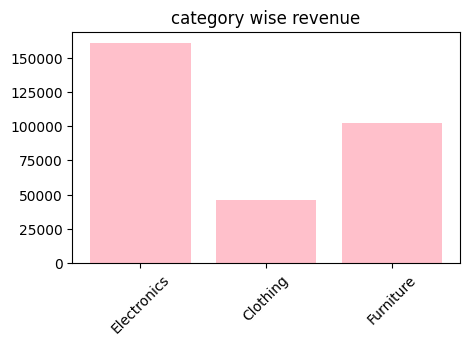

In [54]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import sum
import os
from google.colab import drive
drive.mount('/content/drive')

output_path = '/content/drive/My Drive/data engineering/pics'

os.makedirs(output_path, exist_ok=True)
category = df.groupBy("category").agg(sum("revenue").alias("total revenue"))
cat_df = category.toPandas()
fig  =plt.figure(figsize=(5,3))
plt.bar(cat_df["category"],cat_df["total revenue"],color = "pink")
plt.title("category wise revenue")
plt.xticks(rotation = 45)
plt.savefig(output_path + "/bar_revenue_by_category.png")
plt.show()
plt.close(fig)

Create a line chart showing revenue trend by order_date (sorted by date).

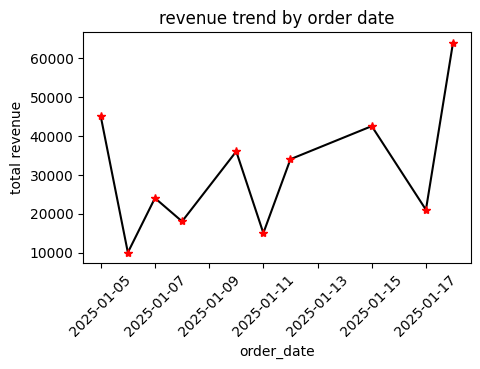

In [55]:
datee = df.groupBy("order_date").agg(sum("revenue").alias("total_revenue")).orderBy("order_date")
da_df = datee.toPandas()
fig = plt.figure(figsize=(5,3))
plt.plot(da_df["order_date"],da_df["total_revenue"],color = "black", marker="*",markerfacecolor ="red",markeredgecolor = "red")

plt.xlabel("order_date")
plt.ylabel("total revenue")
plt.xticks(rotation = 45)
plt.title("revenue trend by order date")
plt.savefig(output_path + "/revenue_by_orderdate.png")
plt.show()
plt.close(fig)

Create a pie chart showing percentage contribution of each region to total
revenue.

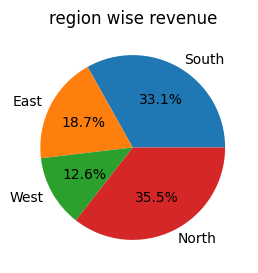

In [56]:
region = df.groupBy("region").agg(sum("revenue").alias("total_revenue"))
re_df = region.toPandas()

fig = plt.figure(figsize = (5,3))
plt.pie(re_df["total_revenue"], labels = re_df["region"],autopct='%1.1f%%')
plt.title("region wise revenue")
plt.savefig(output_path + "/revenue_by_region.png")
plt.show()
plt.close(fig)

Create a stacked bar chart comparing total quantity sold per category by
region.

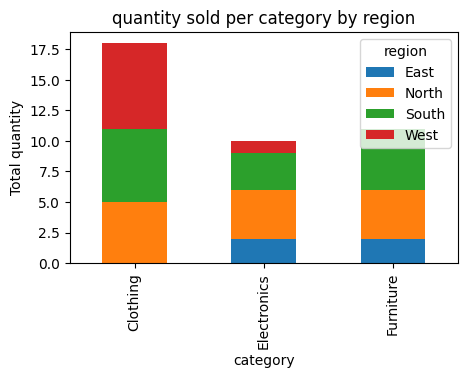

In [57]:
stack = df.groupBy("category","region").agg(sum("quantity").alias("total_quantity")).toPandas()
pivot = stack.pivot(index = "category",columns = "region",values = "total_quantity").fillna(0)

pivot.plot(kind = "bar",stacked = True , figsize= (5,3))
plt.xlabel("category")
plt.ylabel("Total quantity")
plt.title("quantity sold per category by region")
plt.savefig(output_path + "/quantity sold per category by region.png")
plt.show()
plt.close()

Filter and visualize only top 5 products by total revenue in a horizontal bar
chart.

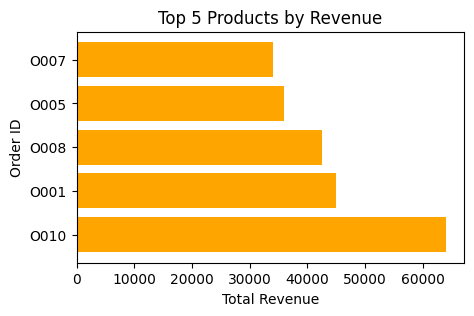

In [59]:
top = df.groupBy("order_id","category").agg(sum("revenue").alias("total_revenue")).orderBy(col("total_revenue").desc()).limit(5)
df5 = top.toPandas()

fig = plt.figure(figsize=(5,3))
plt.barh(df5["order_id"], df5["total_revenue"], color="orange")
plt.xlabel("Total Revenue")
plt.ylabel("Order ID")
plt.title("Top 5 Products by Revenue")
plt.savefig(output_path + "/Top 5 Products by Revenue.png")
plt.show()
plt.close(fig)

Create a scatter plot showing quantity vs price colored by category

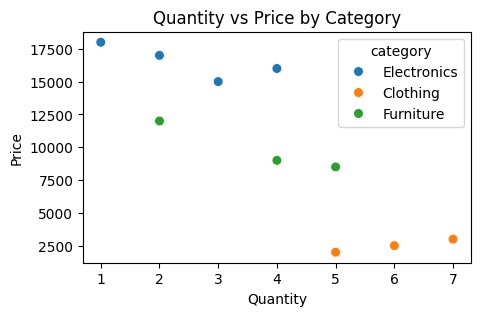

In [60]:
import seaborn as sns
pdf = df.toPandas()

fig = plt.figure(figsize=(5,3))
sns.scatterplot(data=pdf, x="quantity", y="price", hue="category", s=50)
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.title("Quantity vs Price by Category")
plt.savefig(output_path + "/Quantity vs Price by Category.png")
plt.show()
plt.close(fig)

Find average order value by region and plot it as a bar chart.

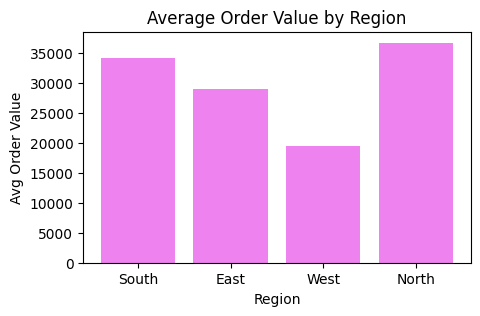

In [61]:
avg_order = df.groupBy("region").agg(avg("revenue").alias("avg_order_value"))
pdf = avg_order.toPandas()

fig = plt.figure(figsize=(5,3))
plt.bar(pdf["region"], pdf["avg_order_value"], color="violet")
plt.xlabel("Region")
plt.ylabel("Avg Order Value")
plt.title("Average Order Value by Region")
plt.savefig(output_path + "/Average Order Value by Region.png")
plt.show()
plt.close(fig)

Create a heatmap (pivot table in Databricks) showing revenue by region and
category.

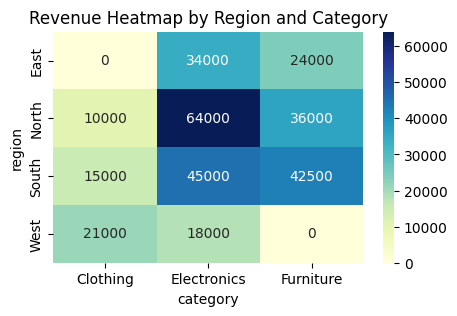

In [62]:
heat_df = df.groupBy("region", "category").agg(sum("revenue").alias("total_revenue")).toPandas()
heat_pivot = heat_df.pivot(index="region", columns="category", values="total_revenue").fillna(0)

fig = plt.figure(figsize=(5,3))
sns.heatmap(heat_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Revenue Heatmap by Region and Category")
plt.savefig(output_path + "/Revenue Heatmap by Region and Category.png")
plt.show()
plt.close(fig)

Bonus: Apply a discount column:

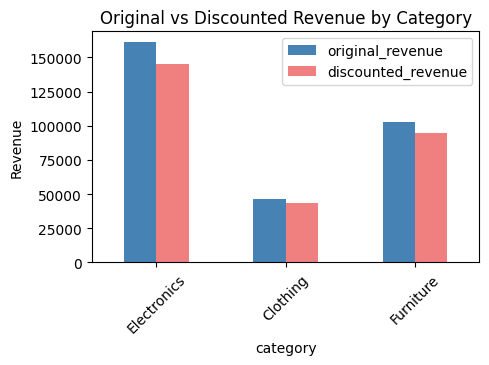

In [63]:
discount_df = df.withColumn(
    "discount",
    when(col("category") == "Electronics", 0.10)
    .when(col("category") == "Clothing", 0.05)
    .when(col("category") == "Furniture", 0.08)
    .otherwise(0)
).withColumn("discounted_revenue", col("revenue") * (1 - col("discount")))

discount_sum = discount_df.groupBy("category").agg(
    sum("revenue").alias("original_revenue"),
    sum("discounted_revenue").alias("discounted_revenue")
).toPandas()

discount_sum.plot(
    x="category",
    kind="bar",
    figsize=(5,3),
    color=["steelblue", "lightcoral"]
)
plt.ylabel("Revenue")
plt.xticks(rotation = 45)
plt.title("Original vs Discounted Revenue by Category")
plt.savefig(output_path + "/Original vs Discounted Revenue by Category.png")
plt.show()
plt.close(fig)

SAVE ALL IMAGES

In [65]:
!ls "/content/drive/My Drive/data engineering/pics"

'Average Order Value by Region.png'
 bar_revenue_by_category.png
'Original vs Discounted Revenue by Category.png'
'quantity sold per category by region.png'
'Quantity vs Price by Category.png'
 revenue_by_orderdate.png
 revenue_by_region.png
'Revenue Heatmap by Region and Category.png'
'Top 5 Products by Revenue.png'
